# Exploratory Data Analysis - Fraud Data

This notebook performs comprehensive exploratory data analysis on the fraud dataset including:
- Data cleaning and preprocessing
- Univariate analysis (distributions)
- Bivariate analysis (feature-target relationships)
- Class distribution analysis
- Handling class imbalance

## 1. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
%matplotlib inline

## 2. Load Data

In [3]:
# Load the datasets
fraud_data = pd.read_csv('../data/raw/Fraud_Data.csv')
ip_country = pd.read_csv('../data/raw/IpAddress_to_Country.csv')

print('Fraud Data Shape:', fraud_data.shape)
print('IP Country Shape:', ip_country.shape)
print('\nFraud Data Columns:', list(fraud_data.columns))
print('IP Country Columns:', list(ip_country.columns))

Fraud Data Shape: (151112, 11)
IP Country Shape: (138846, 3)

Fraud Data Columns: ['user_id', 'signup_time', 'purchase_time', 'purchase_value', 'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class']
IP Country Columns: ['lower_bound_ip_address', 'upper_bound_ip_address', 'country']


In [4]:
# Display first few rows
print('\n=== Fraud Data Sample ===')
fraud_data.head()


=== Fraud Data Sample ===


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [5]:
print('\n=== IP Country Data Sample ===')
ip_country.head()


=== IP Country Data Sample ===


,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


## 3. Data Cleaning

### 3.1 Check for Missing Values

In [6]:
print('=== Missing Values in Fraud Data ===')
missing_fraud = fraud_data.isnull().sum()
print(missing_fraud[missing_fraud > 0] if missing_fraud.sum() > 0 else 'No missing values')
print(f'\nTotal missing: {missing_fraud.sum()}')

print('\n=== Missing Values in IP Country ===')
missing_ip = ip_country.isnull().sum()
print(missing_ip[missing_ip > 0] if missing_ip.sum() > 0 else 'No missing values')
print(f'\nTotal missing: {missing_ip.sum()}')

=== Missing Values in Fraud Data ===
No missing values

Total missing: 0

=== Missing Values in IP Country ===
No missing values

Total missing: 0


### 3.2 Check for Duplicates

In [7]:
print('=== Duplicate Records ===')
print(f'Duplicates in Fraud Data: {fraud_data.duplicated().sum()}')
print(f'Duplicates in IP Country: {ip_country.duplicated().sum()}')

=== Duplicate Records ===
Duplicates in Fraud Data: 0
Duplicates in IP Country: 0


### 3.3 Data Types and Conversions

In [8]:
print('=== Original Data Types ===')
print('\nFraud Data:')
print(fraud_data.dtypes)
print('\nIP Country:')
print(ip_country.dtypes)

=== Original Data Types ===

Fraud Data:
user_id             int64
signup_time        object
purchase_time      object
purchase_value      int64
device_id          object
source             object
browser            object
sex                object
age                 int64
ip_address        float64
class               int64
dtype: object

IP Country:
lower_bound_ip_address    float64
upper_bound_ip_address      int64
country                    object
dtype: object


In [9]:
# Convert time columns to datetime
fraud_data['signup_time'] = pd.to_datetime(fraud_data['signup_time'])
fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'])

# Convert IP addresses to int
fraud_data['ip_address'] = fraud_data['ip_address'].astype(int)
ip_country['lower_bound_ip_address'] = ip_country['lower_bound_ip_address'].astype(int)
ip_country['upper_bound_ip_address'] = ip_country['upper_bound_ip_address'].astype(int)

print('=== Data Types After Conversion ===')
print(fraud_data.dtypes)

=== Data Types After Conversion ===
user_id                    int64
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value             int64
device_id                 object
source                    object
browser                   object
sex                       object
age                        int64
ip_address                 int32
class                      int64
dtype: object


### 3.4 Basic Statistics

In [10]:
print('=== Descriptive Statistics ===')
fraud_data.describe()

=== Descriptive Statistics ===


,user_id,signup_time,purchase_time,purchase_value,age,ip_address,class
count,151112.000000,151112,151112,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,2015-04-20 00:56:09.511329280,2015-06-16 02:56:38.759952896,36.935372,33.140704,-5.455830e+08,0.093646
min,2.000000,2015-01-01 00:00:42,2015-01-01 00:00:44,9.000000,18.000000,-2.147484e+09,0.000000
25%,100642.500000,2015-02-18 09:52:48.500000,2015-04-18 14:41:25.500000,22.000000,27.000000,-2.147484e+09,0.000000
50%,199958.000000,2015-04-19 04:41:30,2015-06-18 13:46:17.500000,35.000000,33.000000,-2.147484e+09,0.000000
75%,300054.000000,2015-06-18 14:47:22.750000128,2015-08-17 18:48:31.500000,49.000000,39.000000,1.078934e+09,0.000000
max,400000.000000,2015-08-18 04:40:29,2015-12-16 02:56:05,154.000000,76.000000,2.147458e+09,1.000000
std,115369.285024,NaN,NaN,18.322762,8.617733,1.666780e+09,0.291336


In [11]:
print('=== Categorical Features Summary ===')
categorical_cols = fraud_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f'\n{col}:')
    print(fraud_data[col].value_counts().head())

=== Categorical Features Summary ===

device_id:
device_id
CQTUVBYIWWWBC    20
ITUMJCKWEYNDD    20
EQYVNEGOFLAWK    20
ZUSVMDEZRBDTX    20
NGQCKIADMZORL    20
Name: count, dtype: int64

source:
source
SEO       60615
Ads       59881
Direct    30616
Name: count, dtype: int64

browser:
browser
Chrome     61432
IE         36727
Safari     24667
FireFox    24610
Opera       3676
Name: count, dtype: int64

sex:
sex
M    88293
F    62819
Name: count, dtype: int64


## 4. Class Distribution Analysis

In [12]:
# Target variable distribution
print('=== Class Distribution ===')
class_dist = fraud_data['class'].value_counts()
print(class_dist)
print(f'\nClass Proportions:')
print(fraud_data['class'].value_counts(normalize=True))
print(f'\nImbalance Ratio: {class_dist[0] / class_dist[1]:.2f}:1')

=== Class Distribution ===
class
0    136961
1     14151
Name: count, dtype: int64

Class Proportions:
class
0    0.906354
1    0.093646
Name: proportion, dtype: float64

Imbalance Ratio: 9.68:1


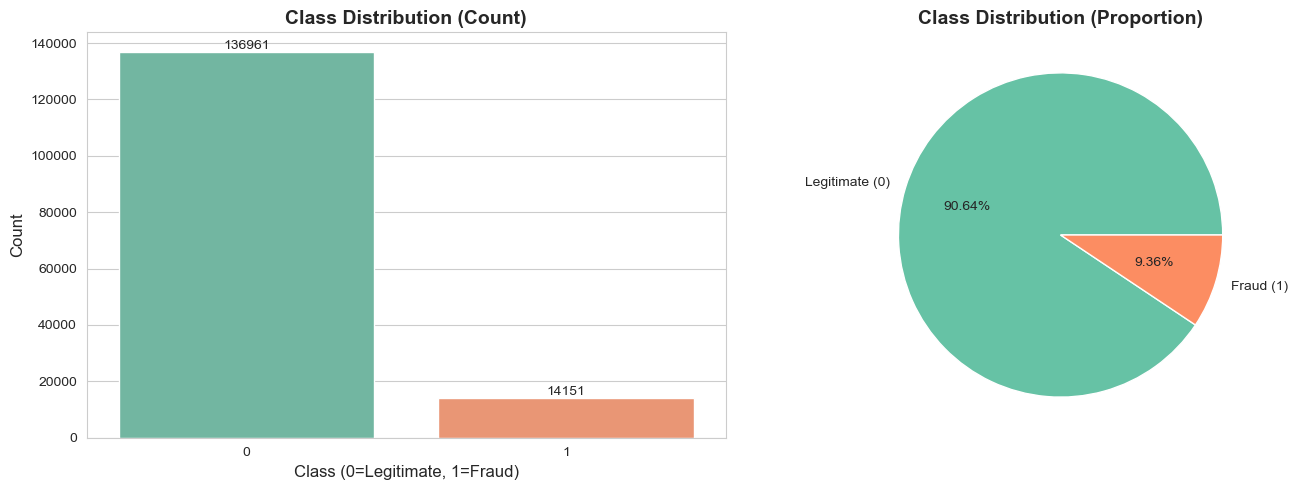

In [13]:
# Visualize class distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
sns.countplot(data=fraud_data, x='class', ax=axes[0], palette='Set2')
axes[0].set_title('Class Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Class (0=Legitimate, 1=Fraud)', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
for container in axes[0].containers:
    axes[0].bar_label(container)

# Pie chart
class_dist.plot(kind='pie', ax=axes[1], autopct='%1.2f%%', 
                labels=['Legitimate (0)', 'Fraud (1)'], colors=['#66c2a5', '#fc8d62'])
axes[1].set_title('Class Distribution (Proportion)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

## 5. Univariate Analysis - Distributions

### 5.1 Numerical Features Distribution

In [14]:
# Select numerical columns (excluding target)
numerical_cols = fraud_data.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols = [col for col in numerical_cols if col not in ['class', 'user_id', 'ip_address']]

print(f'Numerical features for analysis: {numerical_cols}')

Numerical features for analysis: ['purchase_value', 'age']


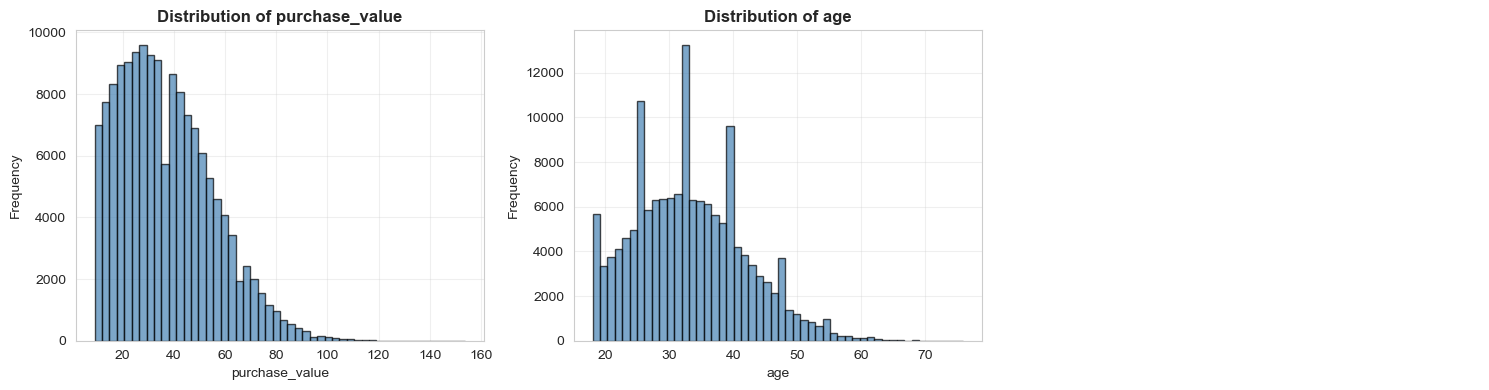

In [15]:
# Distribution plots for numerical features
n_cols = len(numerical_cols)
n_rows = (n_cols + 2) // 3

fig, axes = plt.subplots(n_rows, 3, figsize=(15, n_rows * 4))
axes = axes.flatten() if n_cols > 1 else [axes]

for idx, col in enumerate(numerical_cols):
    ax = axes[idx]
    
    # Histogram with KDE
    fraud_data[col].hist(bins=50, ax=ax, alpha=0.7, color='steelblue', edgecolor='black')
    ax.set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    ax.grid(alpha=0.3)

# Hide extra subplots
for idx in range(n_cols, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

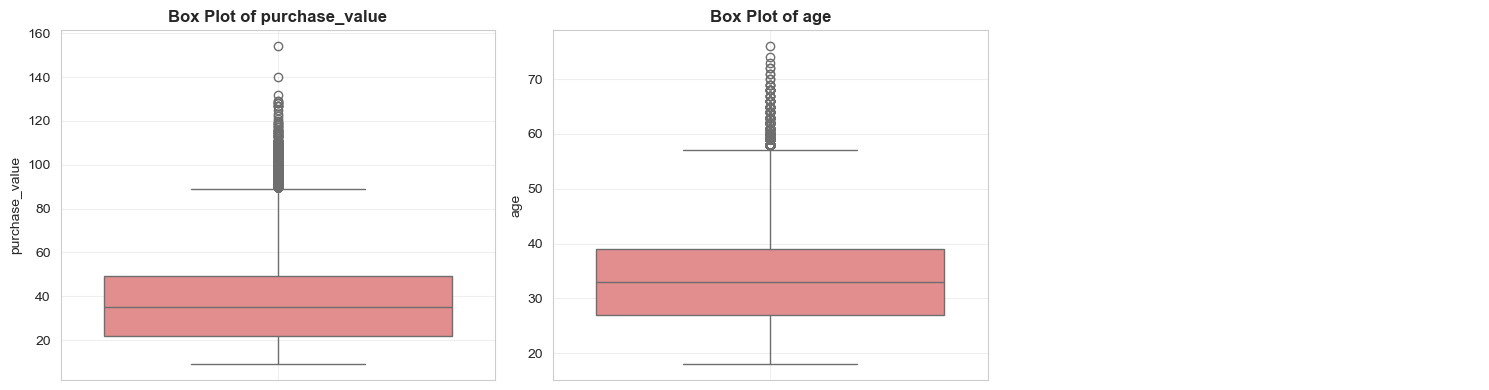

In [16]:
# Box plots for numerical features
fig, axes = plt.subplots(n_rows, 3, figsize=(15, n_rows * 4))
axes = axes.flatten() if n_cols > 1 else [axes]

for idx, col in enumerate(numerical_cols):
    ax = axes[idx]
    
    # Box plot
    sns.boxplot(data=fraud_data, y=col, ax=ax, color='lightcoral')
    ax.set_title(f'Box Plot of {col}', fontsize=12, fontweight='bold')
    ax.set_ylabel(col, fontsize=10)
    ax.grid(alpha=0.3)

# Hide extra subplots
for idx in range(n_cols, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

### 5.2 Categorical Features Distribution

In [17]:
# Categorical columns (excluding high cardinality)
categorical_cols = ['source', 'browser', 'sex']
categorical_cols = [col for col in categorical_cols if col in fraud_data.columns]

print(f'Categorical features for analysis: {categorical_cols}')

Categorical features for analysis: ['source', 'browser', 'sex']


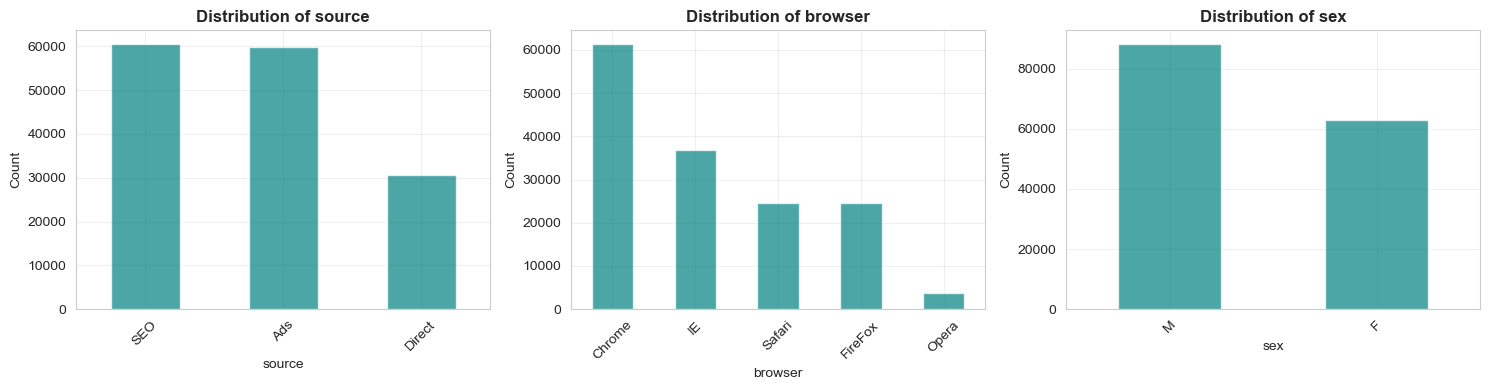

In [18]:
# Bar plots for categorical features
if len(categorical_cols) > 0:
    n_cat = len(categorical_cols)
    n_rows_cat = (n_cat + 2) // 3
    
    fig, axes = plt.subplots(n_rows_cat, 3, figsize=(15, n_rows_cat * 4))
    axes = axes.flatten() if n_cat > 1 else [axes]
    
    for idx, col in enumerate(categorical_cols):
        ax = axes[idx]
        
        # Count plot
        value_counts = fraud_data[col].value_counts().head(10)
        value_counts.plot(kind='bar', ax=ax, color='teal', alpha=0.7)
        ax.set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
        ax.set_xlabel(col, fontsize=10)
        ax.set_ylabel('Count', fontsize=10)
        ax.tick_params(axis='x', rotation=45)
        ax.grid(alpha=0.3)
    
    # Hide extra subplots
    for idx in range(n_cat, len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()

## 6. Bivariate Analysis - Feature-Target Relationships

### 6.1 Numerical Features vs Target

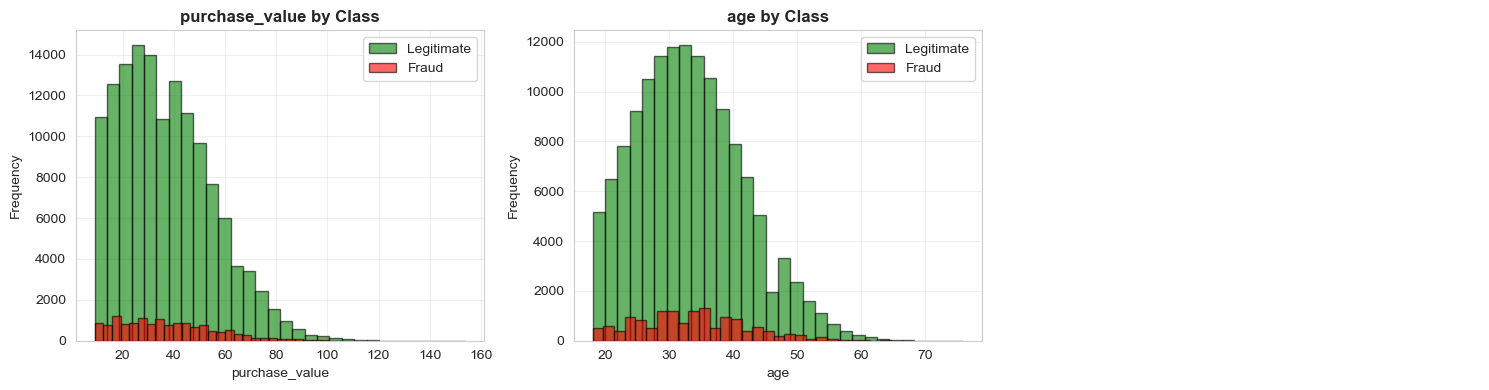

In [19]:
# Distribution of numerical features by class
fig, axes = plt.subplots(n_rows, 3, figsize=(15, n_rows * 4))
axes = axes.flatten() if n_cols > 1 else [axes]

for idx, col in enumerate(numerical_cols):
    ax = axes[idx]
    
    # Overlapping histograms
    fraud_data[fraud_data['class'] == 0][col].hist(bins=30, ax=ax, alpha=0.6, 
                                                     label='Legitimate', color='green', edgecolor='black')
    fraud_data[fraud_data['class'] == 1][col].hist(bins=30, ax=ax, alpha=0.6, 
                                                     label='Fraud', color='red', edgecolor='black')
    ax.set_title(f'{col} by Class', fontsize=12, fontweight='bold')
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    ax.legend()
    ax.grid(alpha=0.3)

# Hide extra subplots
for idx in range(n_cols, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

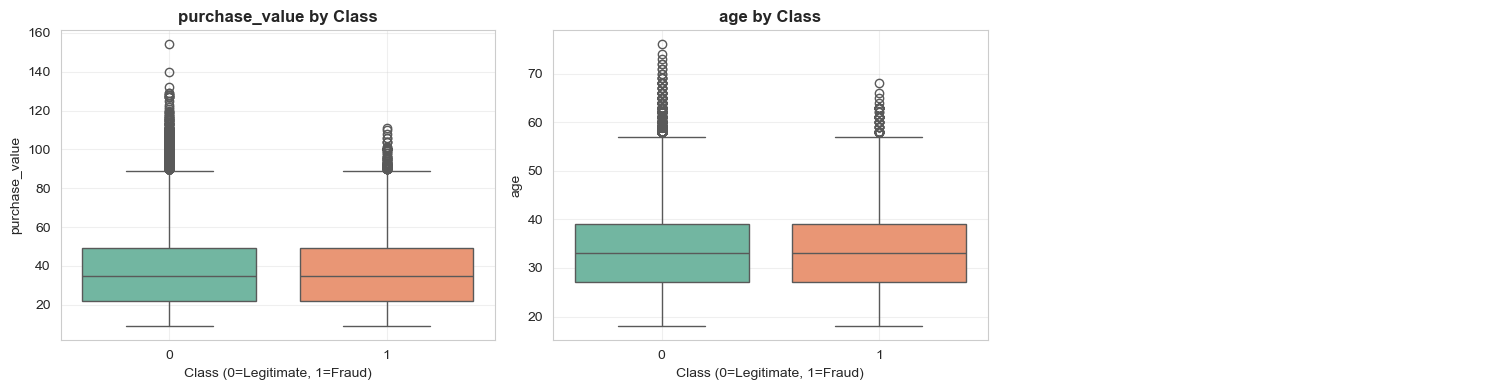

In [20]:
# Box plots of numerical features by class
fig, axes = plt.subplots(n_rows, 3, figsize=(15, n_rows * 4))
axes = axes.flatten() if n_cols > 1 else [axes]

for idx, col in enumerate(numerical_cols):
    ax = axes[idx]
    
    # Box plot by class
    sns.boxplot(data=fraud_data, x='class', y=col, ax=ax, palette='Set2')
    ax.set_title(f'{col} by Class', fontsize=12, fontweight='bold')
    ax.set_xlabel('Class (0=Legitimate, 1=Fraud)', fontsize=10)
    ax.set_ylabel(col, fontsize=10)
    ax.grid(alpha=0.3)

# Hide extra subplots
for idx in range(n_cols, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

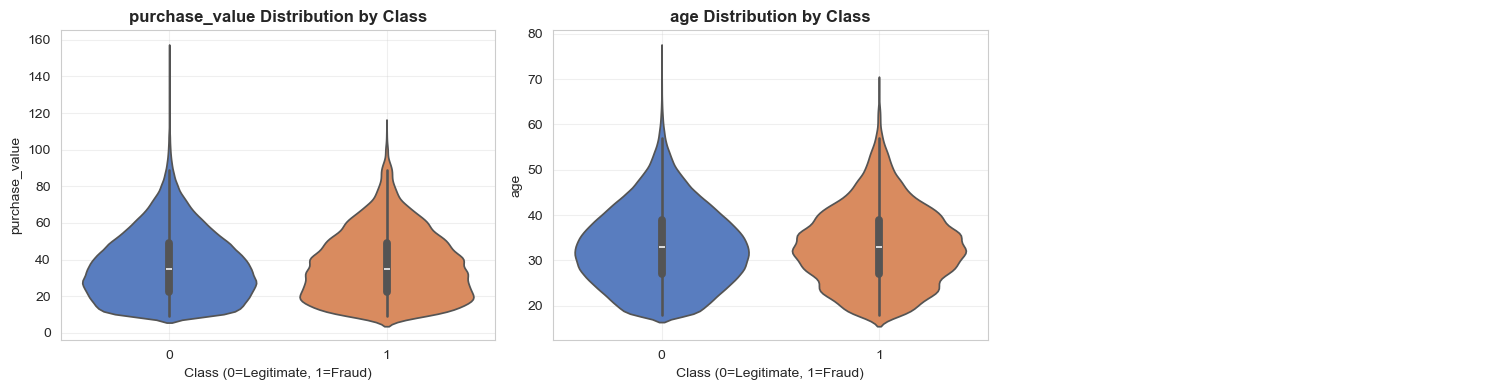

In [21]:
# Violin plots for better distribution visualization
fig, axes = plt.subplots(n_rows, 3, figsize=(15, n_rows * 4))
axes = axes.flatten() if n_cols > 1 else [axes]

for idx, col in enumerate(numerical_cols):
    ax = axes[idx]
    
    # Violin plot by class
    sns.violinplot(data=fraud_data, x='class', y=col, ax=ax, palette='muted')
    ax.set_title(f'{col} Distribution by Class', fontsize=12, fontweight='bold')
    ax.set_xlabel('Class (0=Legitimate, 1=Fraud)', fontsize=10)
    ax.set_ylabel(col, fontsize=10)
    ax.grid(alpha=0.3)

# Hide extra subplots
for idx in range(n_cols, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

### 6.2 Categorical Features vs Target

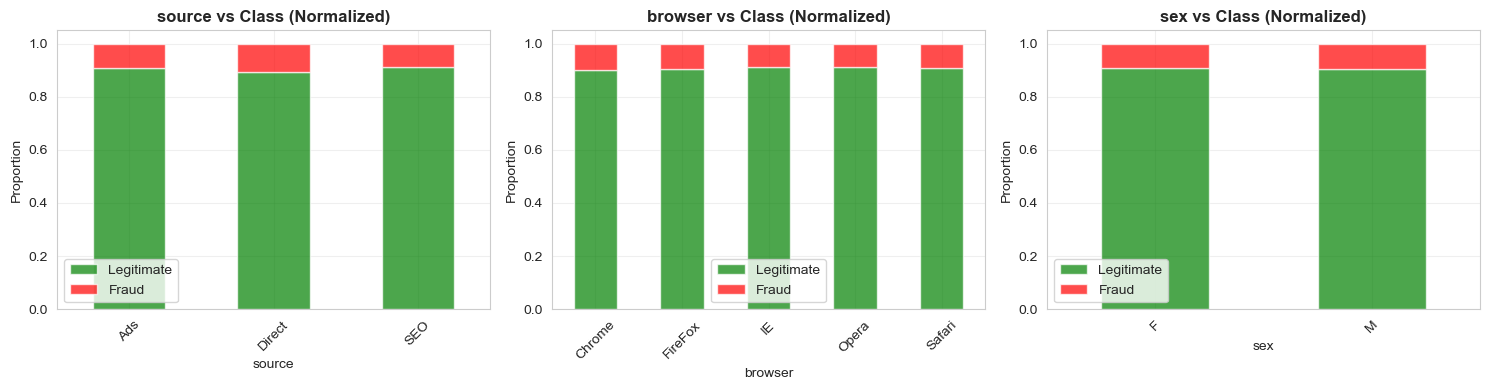

In [22]:
# Stacked bar plots for categorical features by class
if len(categorical_cols) > 0:
    n_cat = len(categorical_cols)
    n_rows_cat = (n_cat + 2) // 3
    
    fig, axes = plt.subplots(n_rows_cat, 3, figsize=(15, n_rows_cat * 4))
    axes = axes.flatten() if n_cat > 1 else [axes]
    
    for idx, col in enumerate(categorical_cols):
        ax = axes[idx]
        
        # Cross-tabulation
        ct = pd.crosstab(fraud_data[col], fraud_data['class'], normalize='index')
        ct.plot(kind='bar', stacked=True, ax=ax, color=['green', 'red'], alpha=0.7)
        ax.set_title(f'{col} vs Class (Normalized)', fontsize=12, fontweight='bold')
        ax.set_xlabel(col, fontsize=10)
        ax.set_ylabel('Proportion', fontsize=10)
        ax.legend(['Legitimate', 'Fraud'])
        ax.tick_params(axis='x', rotation=45)
        ax.grid(alpha=0.3)
    
    # Hide extra subplots
    for idx in range(n_cat, len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()

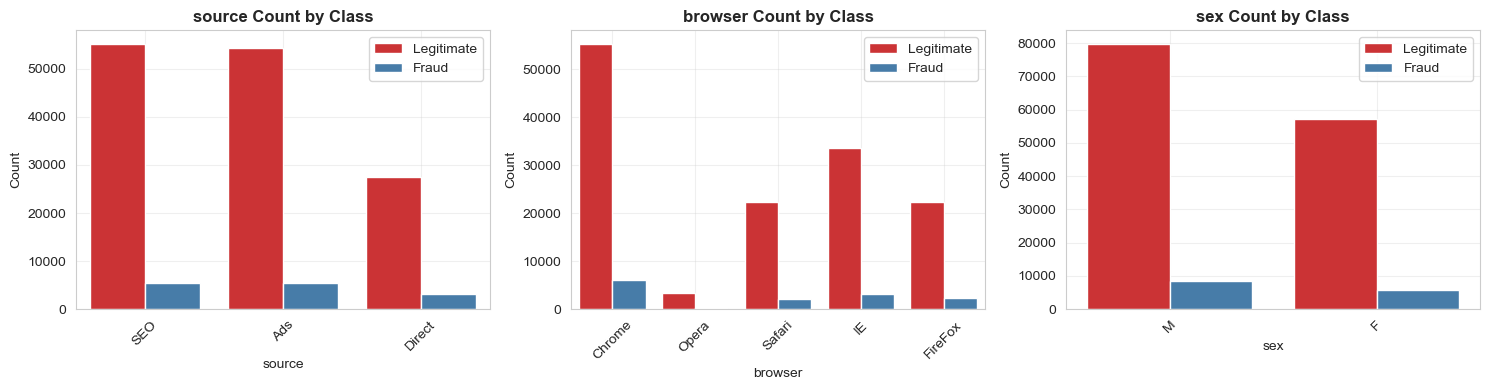

In [23]:
# Count plots with hue for categorical features
if len(categorical_cols) > 0:
    fig, axes = plt.subplots(n_rows_cat, 3, figsize=(15, n_rows_cat * 4))
    axes = axes.flatten() if n_cat > 1 else [axes]
    
    for idx, col in enumerate(categorical_cols):
        ax = axes[idx]
        
        # Count plot with hue
        top_categories = fraud_data[col].value_counts().head(10).index
        data_subset = fraud_data[fraud_data[col].isin(top_categories)]
        sns.countplot(data=data_subset, x=col, hue='class', ax=ax, palette='Set1')
        ax.set_title(f'{col} Count by Class', fontsize=12, fontweight='bold')
        ax.set_xlabel(col, fontsize=10)
        ax.set_ylabel('Count', fontsize=10)
        ax.legend(['Legitimate', 'Fraud'])
        ax.tick_params(axis='x', rotation=45)
        ax.grid(alpha=0.3)
    
    # Hide extra subplots
    for idx in range(n_cat, len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()

### 6.3 Correlation Analysis

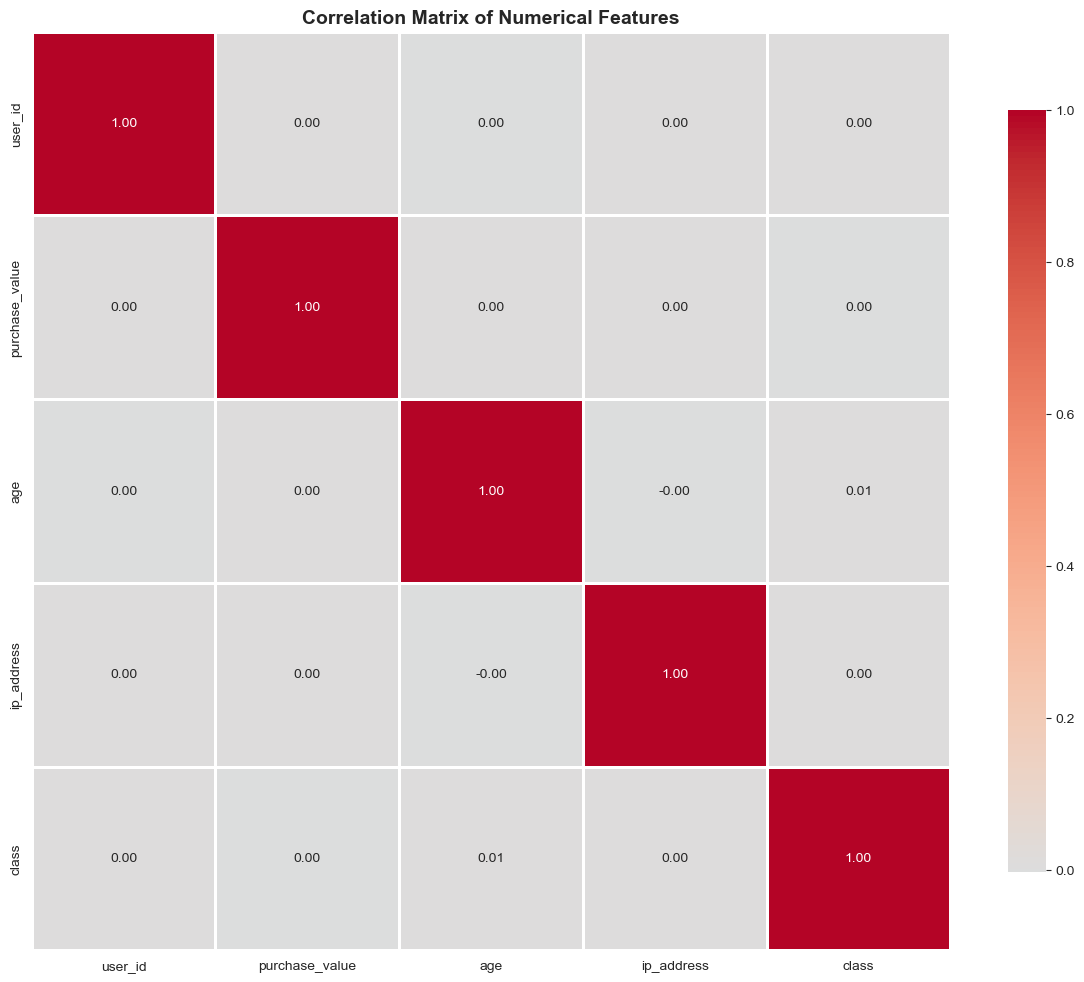

In [24]:
# Correlation matrix for numerical features
numerical_features = fraud_data.select_dtypes(include=[np.number]).columns.tolist()
correlation_matrix = fraud_data[numerical_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numerical Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

=== Correlation with Target (class) ===
class             1.000000
age               0.006624
ip_address        0.003225
user_id           0.001945
purchase_value    0.001011
Name: class, dtype: float64


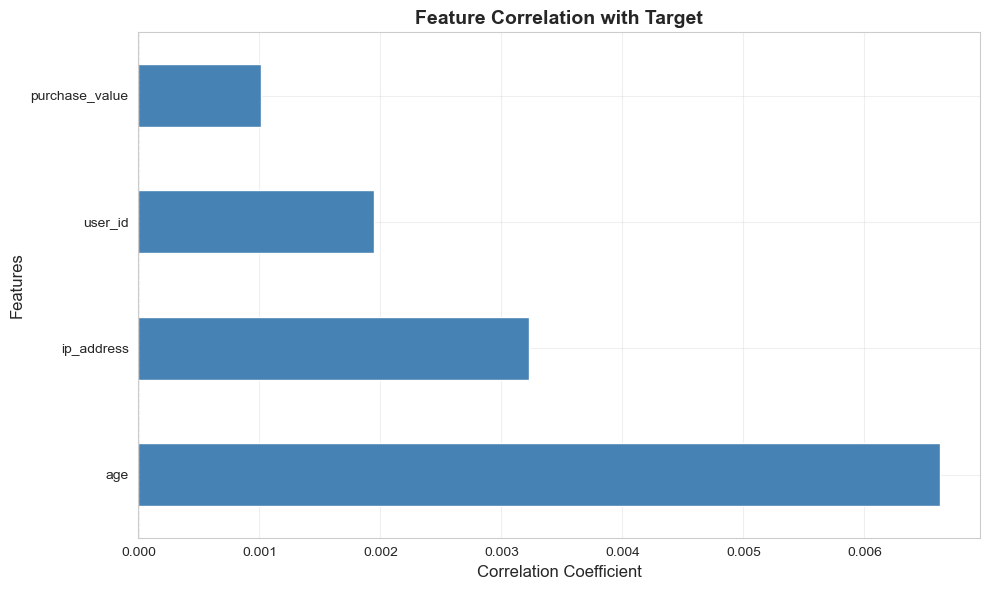

In [25]:
# Correlation with target variable
target_corr = correlation_matrix['class'].sort_values(ascending=False)
print('=== Correlation with Target (class) ===')
print(target_corr)

# Visualize
plt.figure(figsize=(10, 6))
target_corr.drop('class').plot(kind='barh', color='steelblue')
plt.title('Feature Correlation with Target', fontsize=14, fontweight='bold')
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## 7. Feature Engineering

In [26]:
# Create time-based features
fraud_data['signup_hour'] = fraud_data['signup_time'].dt.hour
fraud_data['signup_day'] = fraud_data['signup_time'].dt.dayofweek
fraud_data['purchase_hour'] = fraud_data['purchase_time'].dt.hour
fraud_data['purchase_day'] = fraud_data['purchase_time'].dt.dayofweek

# Time difference between signup and purchase
fraud_data['time_diff_hours'] = (fraud_data['purchase_time'] - fraud_data['signup_time']).dt.total_seconds() / 3600

print('=== New Time-based Features Created ===')
print(fraud_data[['signup_hour', 'signup_day', 'purchase_hour', 'purchase_day', 'time_diff_hours']].head())

=== New Time-based Features Created ===
   signup_hour  signup_day  purchase_hour  purchase_day  time_diff_hours
0           22           1              2             5      1251.856111
1           20           6              1             0         4.984444
2           18           3             18             3         0.000278
3           21           1             13             0       136.690278
4            7           1             18             2      1211.516944


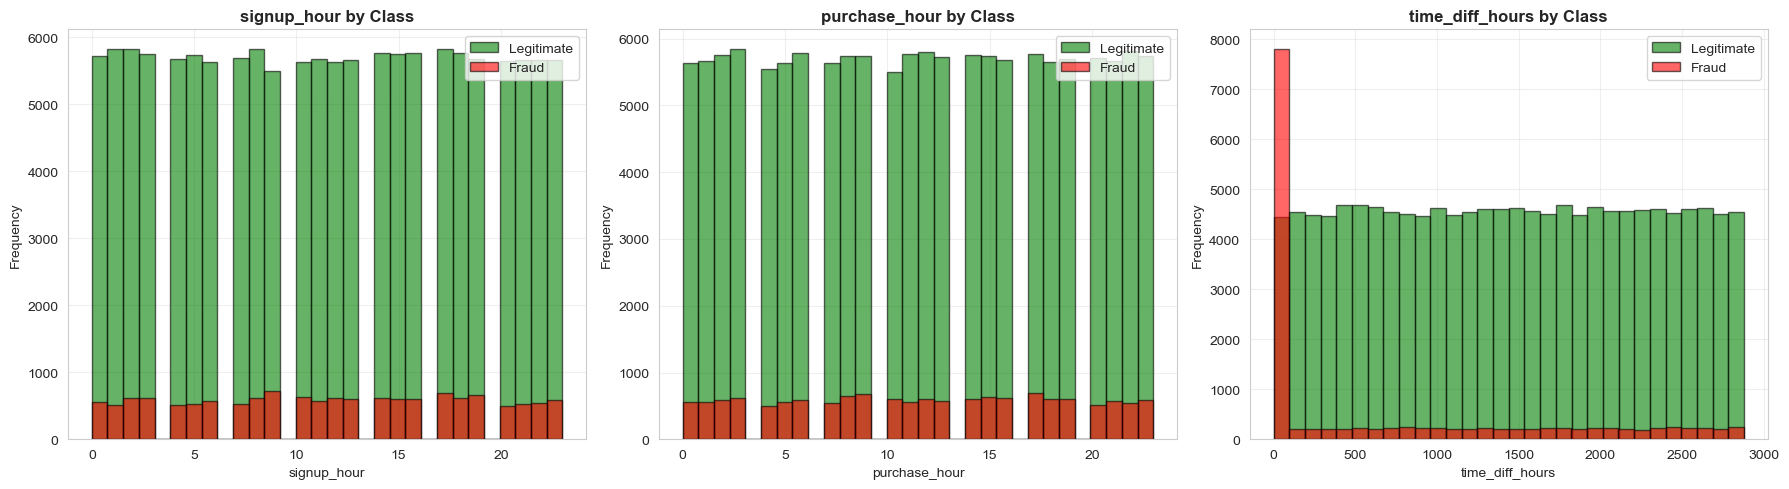

In [27]:
# Visualize time-based features vs target
time_features = ['signup_hour', 'purchase_hour', 'time_diff_hours']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, col in enumerate(time_features):
    ax = axes[idx]
    
    fraud_data[fraud_data['class'] == 0][col].hist(bins=30, ax=ax, alpha=0.6, 
                                                     label='Legitimate', color='green', edgecolor='black')
    fraud_data[fraud_data['class'] == 1][col].hist(bins=30, ax=ax, alpha=0.6, 
                                                     label='Fraud', color='red', edgecolor='black')
    ax.set_title(f'{col} by Class', fontsize=12, fontweight='bold')
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    ax.legend()
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 8. Handling Class Imbalance

In [28]:
# Prepare features for SMOTE
# Select only numerical features for demonstration
feature_cols = ['purchase_value', 'age'] + time_features
feature_cols = [col for col in feature_cols if col in fraud_data.columns]

X = fraud_data[feature_cols].fillna(0)
y = fraud_data['class']

print(f'Original dataset shape: {X.shape}')
print(f'Original class distribution:\n{y.value_counts()}')

Original dataset shape: (151112, 5)
Original class distribution:
class
0    136961
1     14151
Name: count, dtype: int64


In [29]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(f'\nResampled dataset shape: {X_resampled.shape}')
print(f'Resampled class distribution:\n{pd.Series(y_resampled).value_counts()}')


Resampled dataset shape: (273922, 5)
Resampled class distribution:
class
0    136961
1    136961
Name: count, dtype: int64


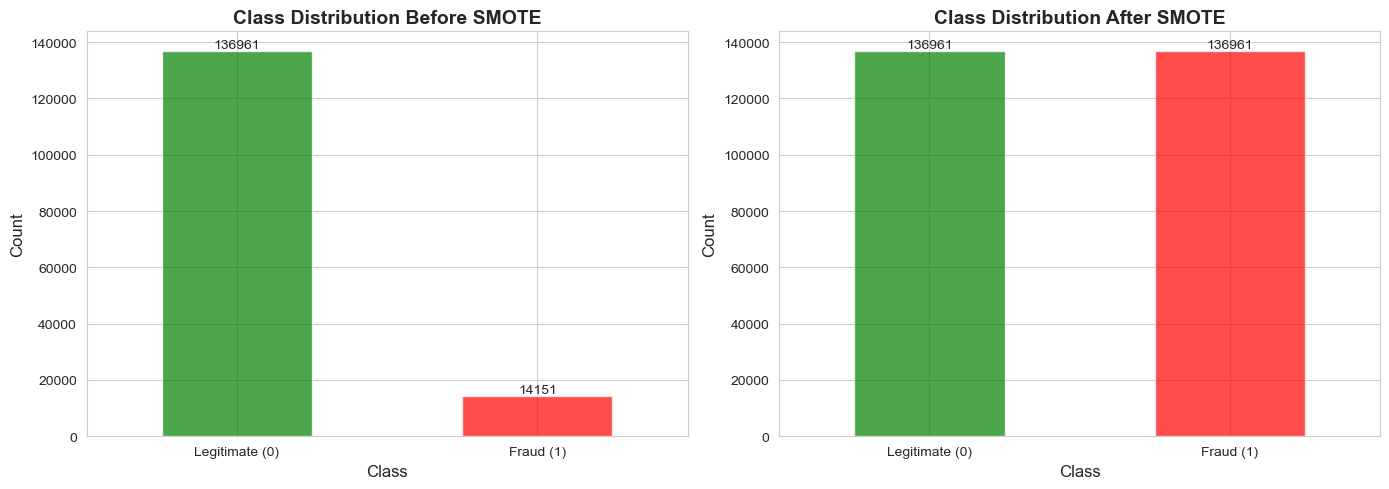

In [30]:
# Visualize before and after SMOTE
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Before SMOTE
y.value_counts().plot(kind='bar', ax=axes[0], color=['green', 'red'], alpha=0.7)
axes[0].set_title('Class Distribution Before SMOTE', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Class', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_xticklabels(['Legitimate (0)', 'Fraud (1)'], rotation=0)
for container in axes[0].containers:
    axes[0].bar_label(container)

# After SMOTE
pd.Series(y_resampled).value_counts().plot(kind='bar', ax=axes[1], color=['green', 'red'], alpha=0.7)
axes[1].set_title('Class Distribution After SMOTE', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Class', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].set_xticklabels(['Legitimate (0)', 'Fraud (1)'], rotation=0)
for container in axes[1].containers:
    axes[1].bar_label(container)

plt.tight_layout()
plt.show()

## 9. Summary and Key Findings

In [31]:
print('='*60)
print('FRAUD DATA EDA SUMMARY')
print('='*60)
print(f'\n1. Dataset Shape: {fraud_data.shape}')
print(f'   - Total Records: {fraud_data.shape[0]:,}')
print(f'   - Total Features: {fraud_data.shape[1]}')

print(f'\n2. Missing Values: {fraud_data.isnull().sum().sum()}')
print(f'   - Duplicates: {fraud_data.duplicated().sum()}')

print(f'\n3. Class Distribution:')
print(f'   - Legitimate (0): {(y == 0).sum():,} ({(y == 0).sum() / len(y) * 100:.2f}%)')
print(f'   - Fraud (1): {(y == 1).sum():,} ({(y == 1).sum() / len(y) * 100:.2f}%)')
print(f'   - Imbalance Ratio: {(y == 0).sum() / (y == 1).sum():.2f}:1')

print(f'\n4. Feature Types:')
print(f'   - Numerical: {len(fraud_data.select_dtypes(include=[np.number]).columns)}')
print(f'   - Categorical: {len(fraud_data.select_dtypes(include=["object"]).columns)}')
print(f'   - Datetime: {len(fraud_data.select_dtypes(include=["datetime"]).columns)}')

print(f'\n5. After SMOTE:')
print(f'   - Total Records: {X_resampled.shape[0]:,}')
print(f'   - Balanced Classes: {pd.Series(y_resampled).value_counts()[0]:,} each')

print('\n' + '='*60)
print('EDA COMPLETE - Ready for Feature Engineering and Modeling')
print('='*60)

FRAUD DATA EDA SUMMARY

1. Dataset Shape: (151112, 16)
   - Total Records: 151,112
   - Total Features: 16

2. Missing Values: 0
   - Duplicates: 0

3. Class Distribution:
   - Legitimate (0): 136,961 (90.64%)
   - Fraud (1): 14,151 (9.36%)
   - Imbalance Ratio: 9.68:1

4. Feature Types:
   - Numerical: 10
   - Categorical: 4
   - Datetime: 2

5. After SMOTE:
   - Total Records: 273,922
   - Balanced Classes: 136,961 each

EDA COMPLETE - Ready for Feature Engineering and Modeling
